In [4]:
import json
import matplotlib.pyplot as plt

import numpy as np

In [5]:
# Load data
with open('output/cuda_scaling_results.json', 'r') as f:
    data = json.load(f)

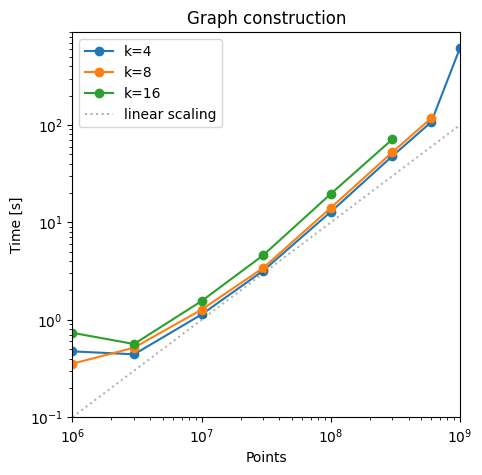

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Group by k value
k_groups = {}
for result in data['results']:
    k = result['parameters']['k']
    n = result['parameters']['n']
    mean_time = result['graph_timings']['build_graph']
    
    if k not in k_groups:
        k_groups[k] = {'n': [], 'times': []}
    
    k_groups[k]['n'].append(n)
    k_groups[k]['times'].append(mean_time)

# Plot
for k in sorted(k_groups.keys()):
    ax.plot(k_groups[k]['n'], k_groups[k]['times'], 'o-', label=f'k={k}')
    
scaling = np.array([10**6, 10**9])
ax.plot(scaling, 1e-7*scaling, ls=':', c='k', alpha=0.3, label='linear scaling')
# ax.plot(scaling, 7e-9*scaling*np.log(scaling), ls=':', c='k', alpha=0.3, label='O(N log N)')
ax.set(xscale='log', yscale='log', ylabel='Time [s]', xlabel='Points', title='Graph construction', ylim=(0.1, 900), xlim=(1e6, 1e9))

ax.legend(loc='upper left')
plt.show()

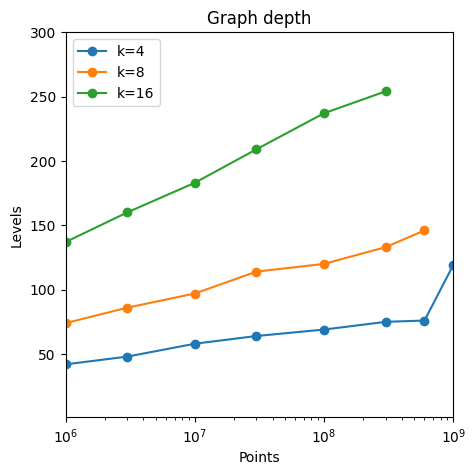

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Group by k value
k_groups = {}
for result in data['results']:
    k = result['parameters']['k']
    n = result['parameters']['n']
    mean_time = result['graph_depth']
    
    if k not in k_groups:
        k_groups[k] = {'n': [], 'times': []}
    
    k_groups[k]['n'].append(n)
    k_groups[k]['times'].append(mean_time)

# Plot
for k in sorted(k_groups.keys()):
    ax.plot(k_groups[k]['n'], k_groups[k]['times'], 'o-', label=f'k={k}')

ax.set(xscale='log', ylabel='Levels', xlabel='Points', title='Graph depth', ylim=(1, 300), xlim=(1e6, 1e9))
ax.legend(loc='upper left')

plt.show()

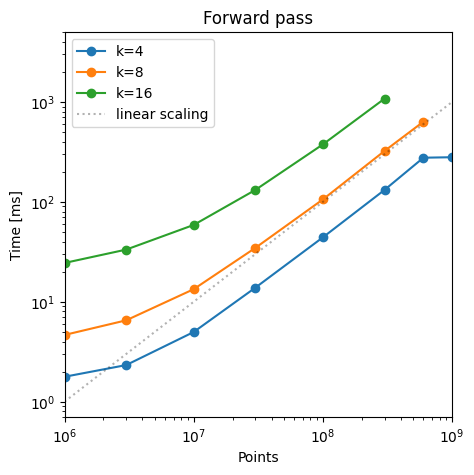

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Group by k value
k_groups = {}
for result in data['results']:
    k = result['parameters']['k']
    n = result['parameters']['n']
    mean_time = result['timing']['mean']
    
    if k not in k_groups:
        k_groups[k] = {'n': [], 'times': []}
    
    k_groups[k]['n'].append(n)
    k_groups[k]['times'].append(mean_time * 1000)

# Plot
for k in sorted(k_groups.keys()):
    ax.plot(k_groups[k]['n'], k_groups[k]['times'], 'o-', label=f'k={k}')

ax.plot([10**6, 10**9], [10**0, 10**3], ls=':', c='k', alpha=0.3, label='linear scaling')
ax.set(xscale='log', yscale='log', ylabel='Time [ms]', xlabel='Points', title='Forward pass', ylim=(0.7,5000), xlim=(1e6, 1e9))
ax.legend(loc='upper left')

plt.show()

In [82]:
# Load data
with open('output/compare_scaling_results.json', 'r') as f:
    data = json.load(f)

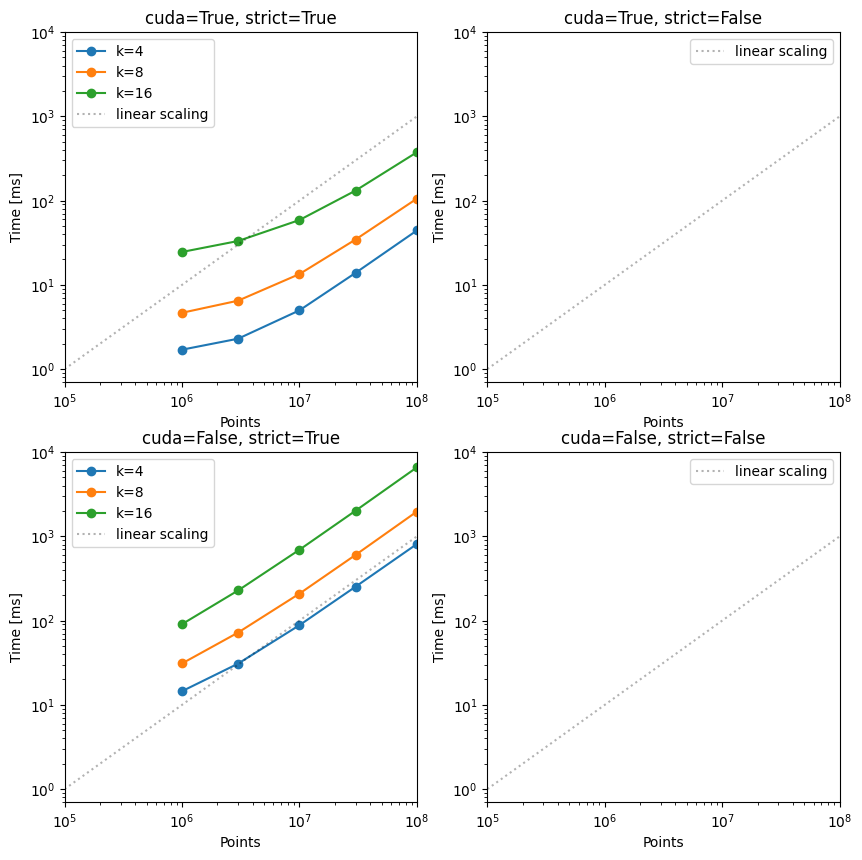

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, cuda in enumerate([True, False]):
    for j, strict in enumerate([True, False]):
        # Filter for cuda=True and strict=True
        filtered_results = []
        for result in data['results']:
            params = result['parameters']
            if params["cuda"] == cuda and params["graph"]["strict"] == strict:
                filtered_results.append(result)

        # Group by k value
        k_groups = {}
        for result in filtered_results:
            k = result['parameters']['k']
            n = result['parameters']['n']
            mean_time = result['timing']['mean']
            
            if k not in k_groups:
                k_groups[k] = {'n': [], 'times': []}
            
            k_groups[k]['n'].append(n)
            k_groups[k]['times'].append(mean_time * 1000)

        # Plot
        for k in sorted(k_groups.keys()):
            axes[i,j].plot(k_groups[k]['n'], k_groups[k]['times'], 'o-', label=f'k={k}')

        axes[i,j].plot([10**5, 10**8], [10**0, 10**3], ls=':', c='k', alpha=0.3, label='linear scaling')

        axes[i,j].set(xscale='log', yscale='log', ylabel='Time [ms]', xlabel='Points', title=f'cuda={cuda}, strict={strict}', ylim=(0.7,10000), xlim=(1e5, 1e8))
        axes[i,j].legend()

plt.show()

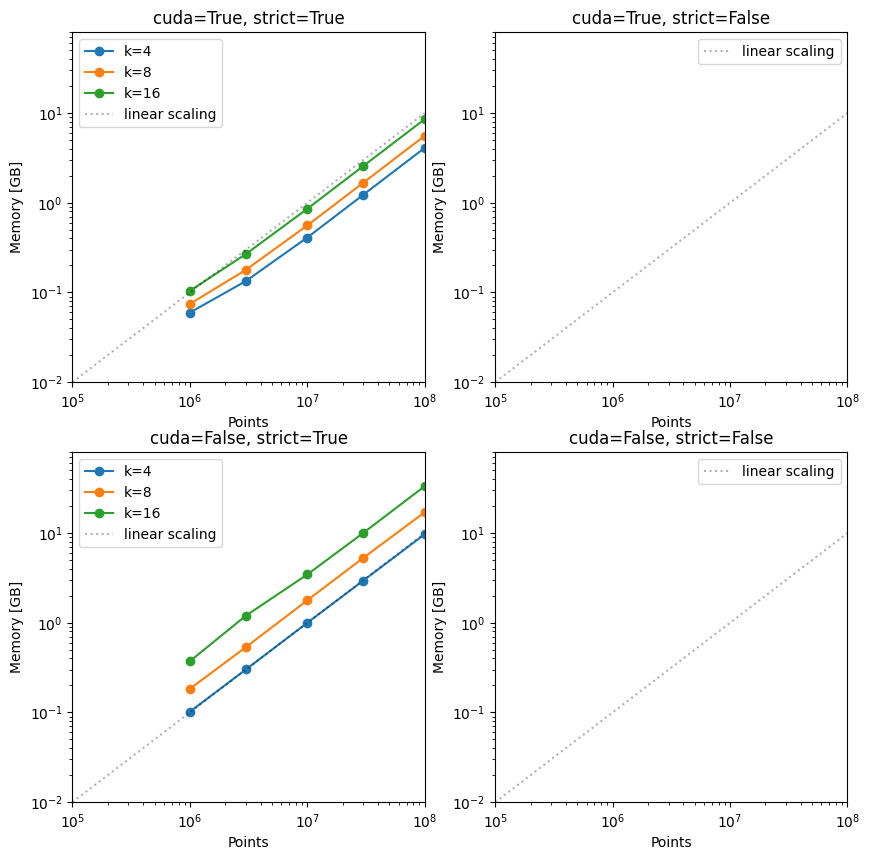

In [88]:
# Memory scaling
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, cuda in enumerate([True, False]):
    for j, strict in enumerate([True, False]):
        # Filter for cuda=True and strict=True
        filtered_results = []
        for result in data['results']:
            params = result['parameters']
            if params["cuda"] == cuda and params["graph"]["strict"] == strict:
                filtered_results.append(result)

        # Group by k value
        k_groups = {}
        for result in filtered_results:
            k = result['parameters']['k']
            n = result['parameters']['n']
            memory = result['compiled_memory_mb'] / 1024
            
            if k not in k_groups:
                k_groups[k] = {'n': [], 'memory': []}

            k_groups[k]['n'].append(n)
            k_groups[k]['memory'].append(memory)

        # Plot
        for k in sorted(k_groups.keys()):
            axes[i,j].plot(k_groups[k]['n'], k_groups[k]['memory'], 'o-', label=f'k={k}')

        axes[i,j].plot([10**5, 10**8], [10**-2, 10**1], ls=':', c='k', alpha=0.3, label='linear scaling')

        axes[i,j].set(xscale='log', yscale='log', ylabel='Memory [GB]', xlabel='Points', title=f'cuda={cuda}, strict={strict}', ylim=(0.01, 80), xlim=(1e5, 1e8))
        axes[i,j].legend()

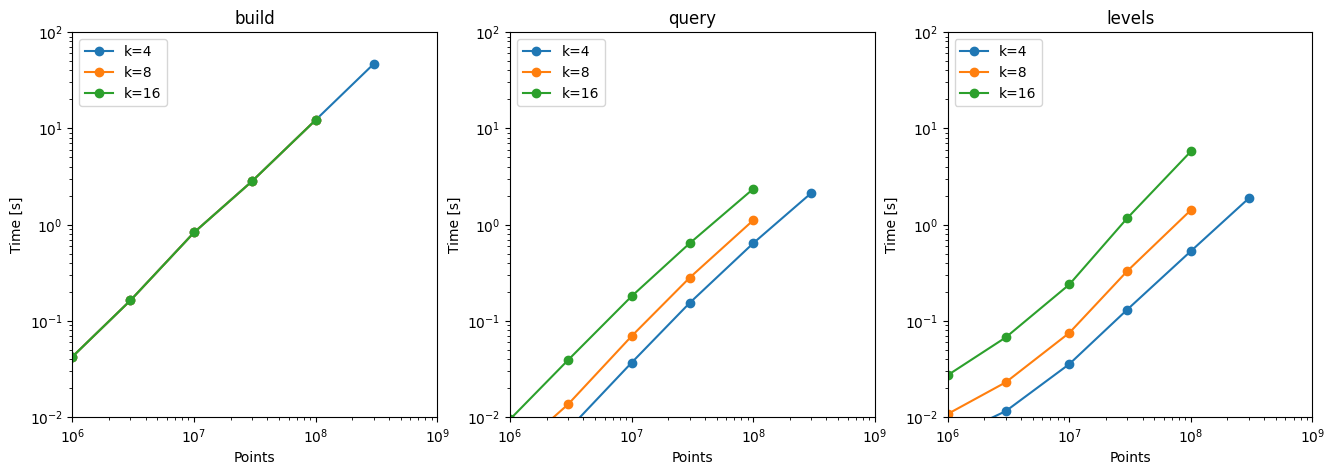

In [54]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 5))

# Group by k value
k_groups = {'build': {}, 'query': {}, 'levels': {}}
for result in data['results']:
    k = result['parameters']['k']
    n = result['parameters']['n']
    graph_timings = result['graph_timings']
    
    if k not in k_groups['build']:
        k_groups['build'][k] = {'n': [], 'times': []}
        k_groups['query'][k] = {'n': [], 'times': []}
        k_groups['levels'][k] = {'n': [], 'times': []}

    k_groups['build'][k]['n'].append(n)
    k_groups['build'][k]['times'].append(graph_timings['build_tree'] )
    k_groups['query'][k]['n'].append(n)
    k_groups['query'][k]['times'].append(graph_timings['query_neighbors'] )
    k_groups['levels'][k]['n'].append(n)
    k_groups['levels'][k]['times'].append((graph_timings['compute_depths_parallel'] + graph_timings['order_by_depth']) )

# Plot
for k in [4, 8, 16]:
    axes[0].plot(k_groups['build'][k]['n'], k_groups['build'][k]['times'], 'o-', label=f'k={k}')
    axes[1].plot(k_groups['query'][k]['n'], k_groups['query'][k]['times'], 'o-', label=f'k={k}')
    axes[2].plot(k_groups['levels'][k]['n'], k_groups['levels'][k]['times'], 'o-', label=f'k={k}')

for i, ax in enumerate(axes):
    ax.set(xscale='log', yscale='log', ylabel='Time [s]', xlabel='Points', title=['build', 'query', 'levels'][i], ylim=(0.01, 100), xlim=(1e6, 1e9))
    ax.legend(loc='upper left')

plt.show()